# Exercise 1

## a. Loading data

In [3]:
import pandas as pd
file = 'police.csv'
df = pd.read_csv(file)
df.head(10)

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation
0,1,2011-01-01,01:00:00,TRO COUNTY,Natrona County,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER
1,2,2011-01-01,01:00:00,TRO COUNTY,Natrona County,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER
2,3,2011-01-01,01:29:00,"2 WY 22|2 WY 22, TETON COUNTY",Teton County,45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...
3,4,2011-01-01,03:00:00,"111 I 80 E, SWEETWATER COUNTY",Sweetwater County,49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY"
4,5,2011-01-01,04:15:00,"10 26|10 26|10 26, PLATTE COUNTY",Platte County,36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...
5,6,2011-01-01,05:55:00,"3 22, TETON COUNTY",Teton County,33.0,white,male,eaeaf19018,K,vehicular,"DRIVE WHILE LIC CANCELLED, SUSPENDED, OR REVOKED"
6,7,2011-01-01,06:20:00,SUBLETTE COUNTY,Sublette County,54.0,white,male,58747fe63d,T,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE
7,8,2011-01-01,07:30:00,"8 I 25 N, LARAMIE COUNTY",Laramie County,48.0,white,male,a4ceae6655,A,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE
8,9,2011-01-01,08:00:00,"95 191, SUBLETTE COUNTY",Sublette County,38.0,white,male,eb37cf8bfd,T,vehicular,COMPULSORY AUTO INSURANCE
9,10,2011-01-01,08:15:00,"31 114, PARK COUNTY",Park County,28.0,white,male,4a74d2fd1f,N,vehicular,EXCEED 65 MPH ON PRMRY/SCNDRY HWY (SPEED)


## b. Summary of missing values

In [4]:
df.shape #shows the size of the data

(173311, 12)

In [27]:
df.isnull().sum()

raw_row_number         0
date                 363
time                  23
location            1098
county_name         2322
subject_age          718
subject_race         509
subject_sex         1279
officer_id_hash        0
department_id      10703
type                   0
violation              2
dtype: int64

## c. Drop column county_name

In [28]:
df.drop('county_name', axis='columns', inplace = True)
df.shape

(173311, 11)

## d. drop rows with missing values

In [29]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(160118, 11)

## e. Show column data types

In [30]:
df.dtypes

raw_row_number       int64
date                object
time                object
location            object
subject_age        float64
subject_race        object
subject_sex         object
officer_id_hash     object
department_id       object
type                object
violation           object
dtype: object

In [31]:
#df.date.dtype # column date is shown as object but should be date
df['date'].dtype # same as df.date.dtype

dtype('O')

## f. Summary statistics

In [32]:
df.describe()

,raw_row_number,subject_age
count,160118.000000,160118.000000
mean,84122.186993,38.697130
std,49910.732097,14.481527
min,1.000000,10.000000
25%,40690.250000,26.000000
50%,82482.500000,37.000000
75%,127264.750000,50.000000
max,173311.000000,99.000000


# Exercise 2

Follows Exercise 1 where we will handle date and time.

## a. Combine stop_date and stop_time into one column date_and_time

In [33]:
df.date.str.replace('/', '-')
combined = df.date.str.cat(df.time, sep=' ')
combined

0         01/01/2011 01:00:00
1         01/01/2011 01:00:00
2         01/01/2011 01:29:00
3         01/01/2011 03:00:00
4         01/01/2011 04:15:00
5         01/01/2011 05:55:00
6         01/01/2011 06:20:00
7         01/01/2011 07:30:00
8         01/01/2011 08:00:00
9         01/01/2011 08:15:00
10        01/01/2011 09:00:00
11        01/01/2011 09:10:00
12        01/01/2011 09:20:00
13        01/01/2011 09:34:00
14        01/01/2011 09:47:00
15        01/01/2011 09:50:00
16        01/01/2011 09:55:00
17        01/01/2011 09:55:00
18        01/01/2011 10:00:00
19        01/01/2011 10:25:00
20        01/01/2011 10:25:00
21        01/01/2011 10:26:00
22        01/01/2011 10:35:00
23        01/01/2011 10:36:00
24        01/01/2011 10:40:00
25        01/01/2011 10:50:00
26        01/01/2011 11:00:00
27        01/01/2011 11:02:00
28        01/01/2011 11:05:00
29        01/01/2011 11:06:00
                 ...         
173276    31/12/2012 20:45:00
173277    31/12/2012 20:50:00
173278    

In [34]:
# adding the column date_and_time to the dataframe.
df['date_and_time'] = combined
df.dtypes

,raw_row_number,date,time,location,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation,date_and_time
0,1,01/01/2011,01:00:00,TRO COUNTY,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER,01/01/2011 01:00:00
1,2,01/01/2011,01:00:00,TRO COUNTY,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER,01/01/2011 01:00:00
2,3,01/01/2011,01:29:00,"2 WY 22|2 WY 22, TETON COUNTY",45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...,01/01/2011 01:29:00
3,4,01/01/2011,03:00:00,"111 I 80 E, SWEETWATER COUNTY",49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY",01/01/2011 03:00:00
4,5,01/01/2011,04:15:00,"10 26|10 26|10 26, PLATTE COUNTY",36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...,01/01/2011 04:15:00
5,6,01/01/2011,05:55:00,"3 22, TETON COUNTY",33.0,white,male,eaeaf19018,K,vehicular,"DRIVE WHILE LIC CANCELLED, SUSPENDED, OR REVOKED",01/01/2011 05:55:00
6,7,01/01/2011,06:20:00,SUBLETTE COUNTY,54.0,white,male,58747fe63d,T,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE,01/01/2011 06:20:00
7,8,01/01/2011,07:30:00,"8 I 25 N, LARAMIE COUNTY",48.0,white,male,a4ceae6655,A,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE,01/01/2011 07:30:00
8,9,01/01/2011,08:00:00,"95 191, SUBLETTE COUNTY",38.0,white,male,eb37cf8bfd,T,vehicular,COMPULSORY AUTO INSURANCE,01/01/2011 08:00:00
9,10,01/01/2011,08:15:00,"31 114, PARK COUNTY",28.0,white,male,4a74d2fd1f,N,vehicular,EXCEED 65 MPH ON PRMRY/SCNDRY HWY (SPEED),01/01/2011 08:15:00


## b. Drop the columns date and time.

In [35]:
df.drop(columns=['date', 'time'], inplace = True)
df.shape

(160118, 10)

## c. convert date_and_time to the right type.

In [36]:
df['date_and_time'] = pd.to_datetime(df['date_and_time'])
df.dtypes

raw_row_number              int64
location                   object
subject_age               float64
subject_race               object
subject_sex                object
officer_id_hash            object
department_id              object
type                       object
violation                  object
date_and_time      datetime64[ns]
dtype: object

## d. set index to date_and_time

In [37]:
df.set_index('date_and_time', inplace=True)
df.head()

,raw_row_number,location,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation
date_and_time,,,,,,,,,
2011-01-01 01:00:00,1,TRO COUNTY,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER
2011-01-01 01:00:00,2,TRO COUNTY,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER
2011-01-01 01:29:00,3,"2 WY 22|2 WY 22, TETON COUNTY",45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...
2011-01-01 03:00:00,4,"111 I 80 E, SWEETWATER COUNTY",49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY"
2011-01-01 04:15:00,5,"10 26|10 26|10 26, PLATTE COUNTY",36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...


In [38]:
df.index

DatetimeIndex(['2011-01-01 01:00:00', '2011-01-01 01:00:00',
               '2011-01-01 01:29:00', '2011-01-01 03:00:00',
               '2011-01-01 04:15:00', '2011-01-01 05:55:00',
               '2011-01-01 06:20:00', '2011-01-01 07:30:00',
               '2011-01-01 08:00:00', '2011-01-01 08:15:00',
               ...
               '2012-12-31 22:43:00', '2012-12-31 22:45:00',
               '2012-12-31 22:50:00', '2012-12-31 22:54:00',
               '2012-12-31 22:57:00', '2012-12-31 23:10:00',
               '2012-12-31 23:11:00', '2012-12-31 23:22:00',
               '2012-12-31 23:25:00', '2012-12-31 23:50:00'],
              dtype='datetime64[ns]', name='date_and_time', length=160118, freq=None)

In [39]:
df.columns.values #observe that date_and_time is no longer a column of the data

array(['raw_row_number', 'location', 'subject_age', 'subject_race',
       'subject_sex', 'officer_id_hash', 'department_id', 'type',
       'violation'], dtype=object)

## e. Visualise subject_age over time

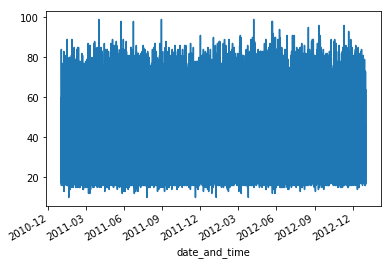

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
df['subject_age'].plot() #too much data points so not informative
#plt.plot(df['subject_age']) #same as above

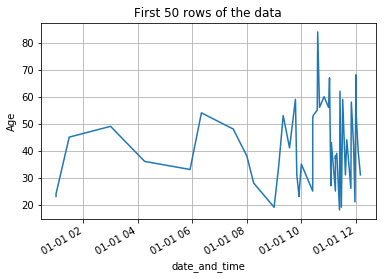

In [41]:
# plot the first 50 rows
df['subject_age'][0:50].plot()
plt.ylabel('Age')
plt.title('First 50 rows of the data')
plt.grid()
plt.show()

In [42]:
df.shape

(160118, 9)

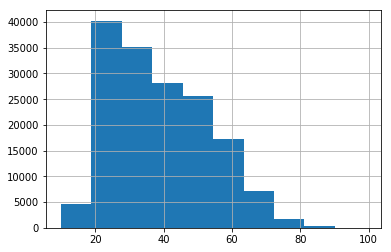

In [43]:
df['subject_age'].hist()

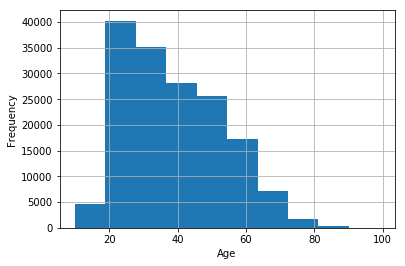

In [44]:
# draw histogram using plt
plt.hist(df['subject_age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

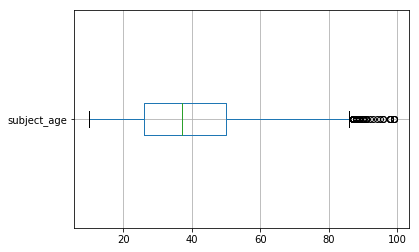

In [45]:
df.boxplot(column='subject_age', vert=False)

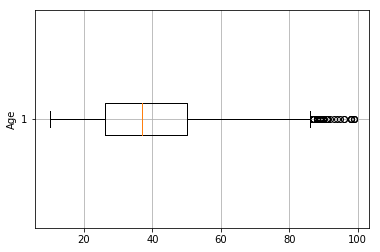

In [46]:
plt.boxplot(df['subject_age'], vert=False)
plt.ylabel('Age')
plt.grid()
plt.show()